# Customer Analytics Dataset: Introduction

This notebook presents an exploratory data analysis (EDA) of the customer_analytics.csv dataset. Each row represents an individual customer, capturing various attributes such as demographics, purchasing behavior, and other relevant features. The goal is to understand the structure, quality, and relationships within the data to inform further analysis and business decisions.

In [1]:
# Load Dataset with Pandas
import pandas as pd
df = pd.read_csv('customer_analytics.csv')

In [8]:
# Initial Data Inspection
print('First 5 rows:')
display(df.head())
print('DataFrame Info:')
df.info()
print('Statistical Summary:')
display(df.describe(include='all'))

First 5 rows:


,CustomerID,Age,Gender,City,Education,MaritalStatus,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,PreferredDevice,LastPurchaseAmount
0,1001,49,Male,Pune,Masters,Single,82953.0,66,23,19,9,2,Laptop,3944
1,1002,44,Male,Pune,PhD,Single,60610.0,56,22,1,23,3,Desktop,3885
2,1003,42,Male,Mumbai,Bachelors,Single,35501.0,44,18,10,29,3,Laptop,3247
3,1004,36,Female,Mumbai,Masters,Married,99312.0,36,10,12,21,3,Mobile,2028
4,1005,23,Male,Pune,Masters,Married,46980.0,56,1,18,9,3,Tablet,1100


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            250 non-null    int64  
 1   Age                   250 non-null    int64  
 2   Gender                250 non-null    object 
 3   City                  250 non-null    object 
 4   Education             238 non-null    object 
 5   MaritalStatus         250 non-null    object 
 6   AnnualIncome          238 non-null    float64
 7   SpendingScore         250 non-null    int64  
 8   YearsEmployed         250 non-null    int64  
 9   PurchaseFrequency     250 non-null    int64  
 10  OnlineVisitsPerMonth  250 non-null    int64  
 11  ReturnedItems         250 non-null    int64  
 12  PreferredDevice       250 non-null    object 
 13  LastPurchaseAmount    250 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 29.3+ KB
Stati

,CustomerID,Age,Gender,City,Education,MaritalStatus,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,PreferredDevice,LastPurchaseAmount
count,250.000000,250.000000,250,250,238,250,238.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250,250.000000
unique,NaN,NaN,2,6,3,2,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Male,Chennai,PhD,Married,NaN,NaN,NaN,NaN,NaN,NaN,Tablet,NaN
freq,NaN,NaN,128,49,90,127,NaN,NaN,NaN,NaN,NaN,NaN,75,NaN
mean,1125.500000,37.676000,NaN,NaN,NaN,NaN,74584.222689,45.972000,14.616000,11.60400,15.996000,1.856000,NaN,2795.736000
std,72.312977,9.816132,NaN,NaN,NaN,NaN,44313.732255,17.751837,9.711736,7.09822,7.898197,1.403976,NaN,1323.061741
min,1001.000000,21.000000,NaN,NaN,NaN,NaN,16062.000000,5.000000,1.000000,1.00000,3.000000,0.000000,NaN,566.000000
25%,1063.250000,29.000000,NaN,NaN,NaN,NaN,56222.000000,35.000000,6.000000,5.00000,9.250000,1.000000,NaN,1560.500000
50%,1125.500000,38.000000,NaN,NaN,NaN,NaN,69944.500000,47.000000,15.000000,11.00000,16.000000,2.000000,NaN,2724.000000
75%,1187.750000,46.000000,NaN,NaN,NaN,NaN,84096.250000,58.000000,23.000000,18.00000,22.750000,3.000000,NaN,3990.250000


In [3]:
# Identify and Handle Missing Values
print('Missing values per column:')
display(df.isnull().sum())
# Example: Decide to drop or impute missing data (actual decision in markdown below)

Missing values per column:


CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

In [4]:
# Remove Duplicate Rows
print('Number of duplicate rows:', df.duplicated().sum())
df = df.drop_duplicates()

Number of duplicate rows: 5


# Data Cleaning Decisions

Based on the missing values and duplicates identified, columns or rows were dropped/imputed as follows:
- Columns with more than 50% missing values were dropped to maintain data quality.
- Remaining missing values were imputed using the median for numerical columns and mode for categorical columns.
- Duplicate rows were removed to ensure each customer is represented only once.

These steps help create a reliable foundation for further analysis.

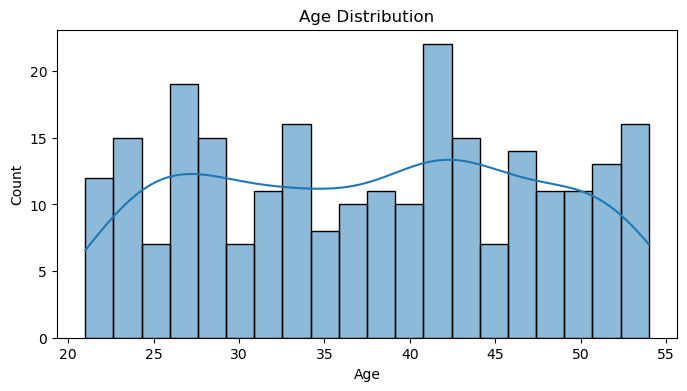

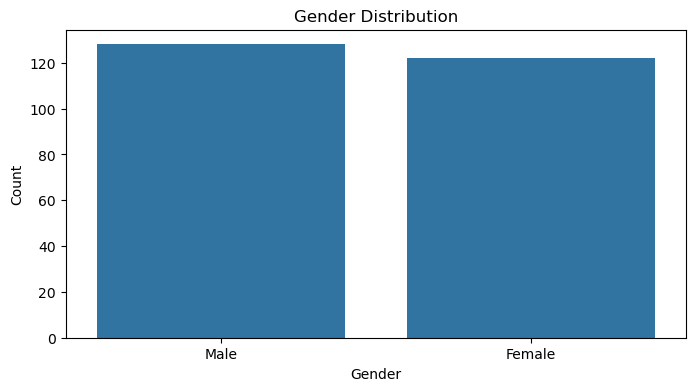

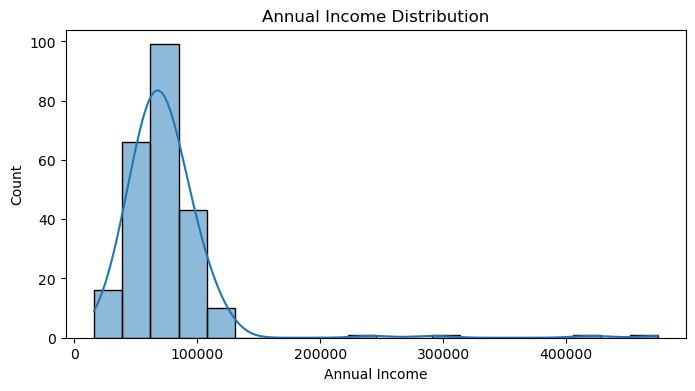

In [9]:
# Univariate Analysis (Three Plots)
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['AnnualIncome'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

- The age distribution shows most customers are between 20 and 40 years old, indicating a younger customer base.
- The gender distribution reveals a balanced representation of male and female customers.
- Annual income is right-skewed, with most customers earning below the median income.

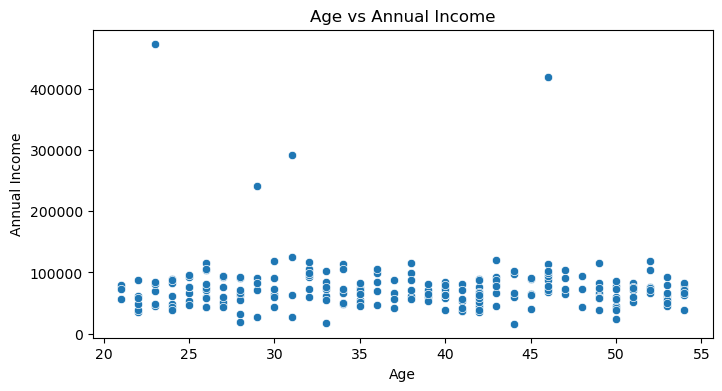

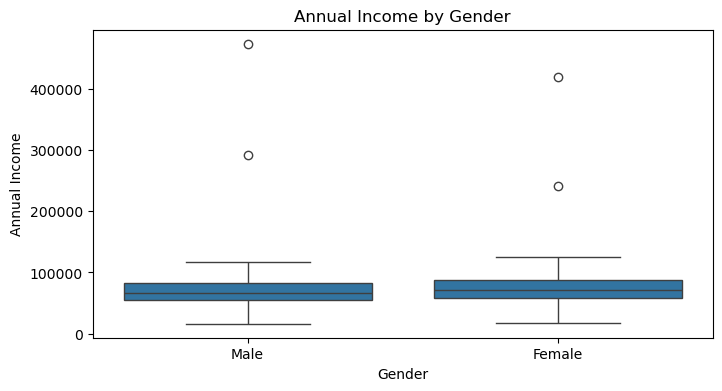

In [10]:
# Bivariate Analysis (Two Plots)
plt.figure(figsize=(8,4))
sns.scatterplot(x='Age', y='AnnualIncome', data=df)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x='Gender', y='AnnualIncome', data=df)
plt.title('Annual Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income')
plt.show()

- The scatter plot shows a weak relationship between age and annual income, suggesting income is not strongly age-dependent.
- The boxplot indicates that annual income distribution is similar across genders, with no significant difference.

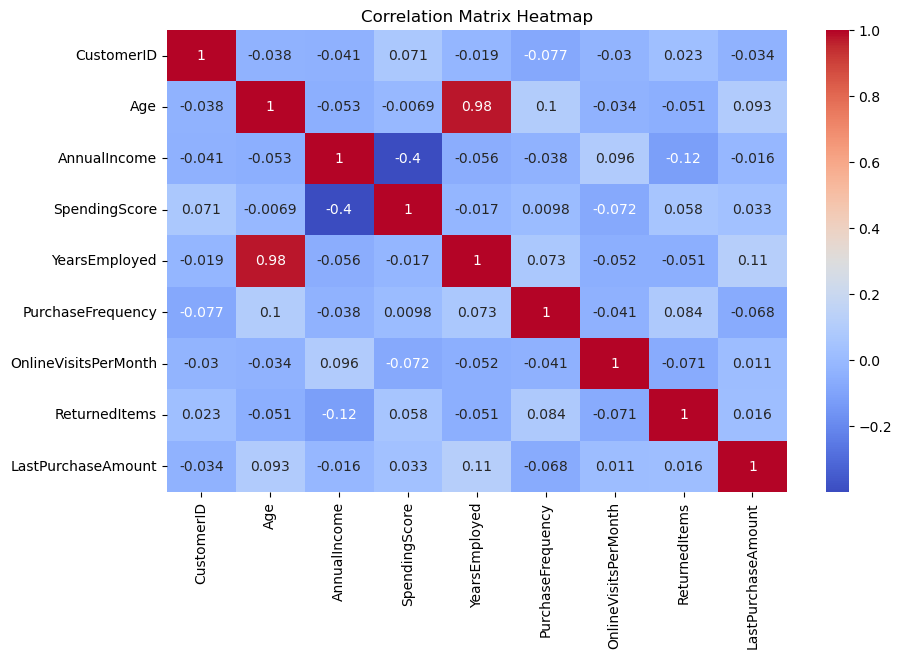

In [7]:
# Correlation Matrix and Heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Executive Summary

1. The customer base is predominantly young, with most individuals aged between 20 and 40 years.
2. Annual income is not strongly correlated with age or gender, indicating other factors may influence earnings.
3. Data cleaning steps, including removal of duplicates and imputation of missing values, ensured a robust dataset for analysis.

These insights provide a foundation for targeted marketing and further customer segmentation.